In [6]:
import pykat
import pylab as pl

%matplotlib inline

In [7]:
basekat = pykat.finesse.kat() #create a new kat object
katfilename = 'Bullseye.kat'
basekat.loadKatFile(katfilename)
basekat.verbose=False

Ignoring Gnuplot/Python terminal command 'gnuterm x11'


In [31]:
#print(basekat.m1.phi)
#basekat.m1.phi=1
#print(basekat.m1.phi)
#basekat.saveScript('test_pykatsave.kat')
kat=basekat.deepcopy()
kat.noxaxis=True
dir(kat)

#kat.parseCommands("""
#    xaxis mygauss zrx lin 0.8 1.2 200
#    put mygauss zry $x1""")


out = kat.run(printerr=1)


Saving data 0%
 --- cavity tracing
 cavity cav1:
  cavity is stable! Eigenvalues:
  q=1i, w0=581.96367um z=0m g=0
  finesse : 312.583, round-trip power loss: 0.0199
  opt. length: 2m, FSR: 149.89623MHz
  FWHM: 479.54025kHz (pole: 239.77012kHz)
 
 
 computation time:  <1s



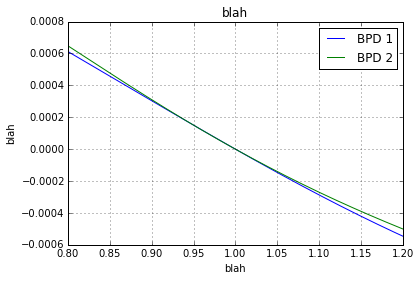

In [12]:
pl.figure()
pl.plot(out.x,out["bpd1"],label="BPD 1")
pl.plot(out.x,out["bpd2"],label="BPD 2")
pl.legend()
pl.grid()
pl.xlabel("blah")
pl.ylabel("blah")
pl.title("blah")

pl.savefig("figname.pdf")


In [14]:
kat2 = basekat.deepcopy()


kat2.parseCommands("""
        xaxis m1 phi lin -180 180 360
        """)
out2 = kat2.run()

pl.figure()
pl.plot(out.x,out["bpd1"],label="BPD 1")
pl.plot(out.x,out["bpd2"],label="BPD 2")
pl.legend()
pl.grid()
pl.xlabel("blah")
pl.ylabel("blah")
pl.title("blah")



Removed existing object 'xaxis' of type <class 'pykat.commands.xaxis'> to add line 'xaxis m1 phi lin -180 180 360'

------------------------------------------------------------
Error from Finesse:
 put: parameter mygauss zry out of range
------------------------------------------------------------



SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.


In [34]:
kat.components

{u'bs1': <abc.pykat.components.beamSplitter_185 at 0x107266050>,
 u'bs2': <abc.pykat.components.beamSplitter_187 at 0x10726fc90>,
 u'eom': <abc.pykat.components.modulator_184 at 0x106ab0c50>,
 u'l1': <abc.pykat.components.laser_183 at 0x106ab0790>,
 u'm1': <abc.pykat.components.mirror_178 at 0x10727c310>,
 u'm2': <abc.pykat.components.mirror_181 at 0x1071fc4d0>,
 u's1': <abc.pykat.components.space_182 at 0x1072a5290>,
 u's2': <abc.pykat.components.space_180 at 0x1071fcc90>,
 u's3': <abc.pykat.components.space_177 at 0x107283e90>,
 u's4': <abc.pykat.components.space_179 at 0x106aa1210>,
 u's_cav': <abc.pykat.components.space_186 at 0x10726f9d0>}

In [35]:
basekat = pykat.finesse.kat() #create a new kat object
katfilename = 'Bullseye.kat'
basekat.loadKatFile(katfilename)
basekat.verbose=False


kat=basekat.deepcopy()
kat.m2.Rc = 1.8
#kat.m1.T=1
#kat.m1.R=0
#kat.m2.T=1
#kat.m2.R=0

kat.parseCommands("""
    ad HG00trans 0 0 0 n9 
    ad HG20trans 2 0 0 n9
    ad HG02trans 0 2 0 n9
    ad HG11trans 1 1 0 n9
    ad HG40trans 4 0 0 n9
    ad HG31trans 3 1 0 n9
    ad HG22trans 2 2 0 n9
    ad HG13trans 1 3 0 n9
    ad HG04trans 0 4 0 n9
    """)

kat.parseCommands("""
    gauss mygauss m1 n6 581.96367u 0 
    xaxis mygauss zrx lin 0.8 1.2 200
    put mygauss zry $x1""")

out=kat.run()

Ignoring Gnuplot/Python terminal command 'gnuterm x11'
Removed existing object 'xaxis' of type <class 'pykat.commands.xaxis'> to add line 'xaxis mygauss zrx lin 0.8 1.2 200'


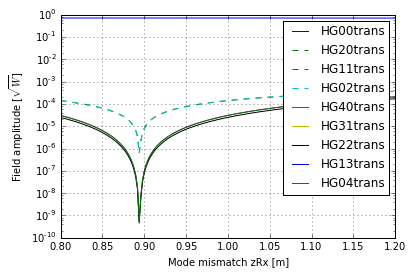

In [36]:
pl.figure()
pl.semilogy(out.x,out["HG00trans"],label="HG00trans")
pl.semilogy(out.x,out["HG20trans"],'--',label="HG20trans")
pl.semilogy(out.x,out["HG11trans"],'--',label="HG11trans")
pl.semilogy(out.x,out["HG02trans"],'--',label="HG02trans")
pl.semilogy(out.x,out["HG40trans"],label="HG40trans")
pl.semilogy(out.x,out["HG31trans"],label="HG31trans")
pl.semilogy(out.x,out["HG22trans"],label="HG22trans")
pl.semilogy(out.x,out["HG13trans"],label="HG13trans")
pl.semilogy(out.x,out["HG04trans"],label="HG04trans")
pl.legend()
pl.grid()
pl.xlabel('Mode mismatch zRx [m]')
pl.ylabel('Field amplitude [$\sqrt{W}$]')
pl.savefig('trans_amps_cavon_rcis1pt8.pdf')
#for det in kat.get

TypeError: isinstance() arg 2 must be a class, type, or tuple of classes and types

In [23]:
dir(out)
print out.ylabels

[u'inphase', u'HG00trans', u'HG20trans', u'HG02trans', u'HG11trans', u'HG40trans', u'HG31trans', u'HG22trans', u'HG13trans', u'HG04trans']
